## 하둡 워드카운팅 결과를 시각화하기

In [56]:
import pandas as pd
import numpy as np

In [2]:
path = r'C:\Users\709-000\Desktop\temp\example'

In [3]:
df = pd.read_csv(path+'\wordcloud.csv', encoding='euc-kr', skiprows=1)

In [19]:
df1 = df.iloc[:, [0,1]]

df2 = df.iloc[:, [2,3]]
df2.rename(columns={'item.1': 'item', 'count.1': 'count'}, inplace=True)

df3 = df.iloc[:, [4,5]]
df3.rename(columns={'item.2': 'item', 'count.2': 'count'}, inplace=True)

df4 = df.iloc[:, [6,7]]
df4.rename(columns={'item.3': 'item', 'count.3': 'count'}, inplace=True)

df5 = df.iloc[:, [8,9]]
df5.rename(columns={'item.4': 'item', 'count.4': 'count'}, inplace=True)

C:\AN\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [59]:
concat_df1 = pd.concat([df1, df2], axis=0)
concat_df2 = pd.concat([concat_df1, df3], axis=0)
concat_df3 = pd.concat([concat_df2, df4], axis=0)
concat_df = pd.concat([concat_df3, df5], axis=0)

In [61]:
cc_df = concat_df.dropna(axis=0)

In [84]:
cc_df1 = cc_df.sort_values(by=['count'], ascending=False)

In [147]:
cc_df2 = cc_df1.groupby(by=['item']).sum().sort_values(['count'], ascending=False).reset_index()

In [148]:
cc_df2.head()

,item,count
0,the,612.0
1,of,411.0
2,and,368.0
3,to,306.0
4,a,186.0


# 워드클라우드 생성

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
# 모듈이 없다면 pip install wordcloud
from wordcloud import WordCloud

In [203]:
font_path = r'C:\Windows\Fonts\NanumBarunGothic.ttf'
wc = WordCloud(font_path=font_path, width=800, height=600, background_color='white')

In [204]:
cloud = wc.generate_from_frequencies(dict(cc_df2.values))

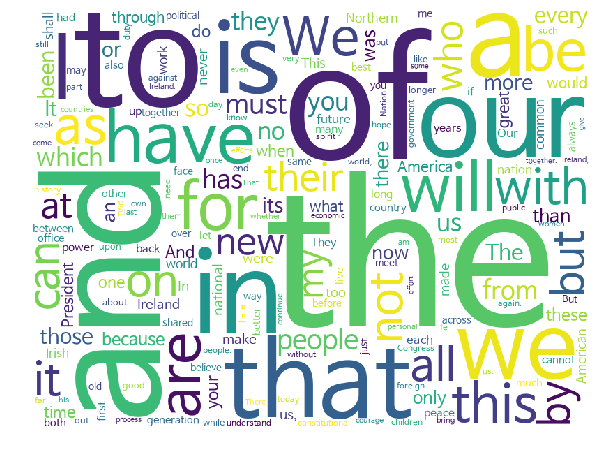

In [213]:
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

참고 : https://pinkwink.kr/1029